<div style="display: flex; justify-content: space-between; align-items: flex-start; margin: 0px 0px 5px 0px;">
    <div style="text-align: left;">
        <img src="https://upload.wikimedia.org/wikipedia/commons/b/b6/HULT_IBS_Logo_Outline_Black_%28cropped%29.png" width="150" style="margin: 10px 0px 5px 0px;"/>
        <div style="margin: 0px 0px 0px 0px;">
            <span style="color: #808080;"><b>Program:</b> Master's in Business Analytics (Dual Degree)<br></span>
            <span style="color: #808080;"><b>Professor:</b> Sílvia Ariza Sentís<br></span>
            <span style="color: #808080;"><b>Date:</b> 03 December 2023<br></span>
        </div>
    </div>
    
<div style="float: right; margin: 10px 15px 15px 50px; text-align: center;">
        <a href="https://www.linkedin.com/in/surajudasi/" target="_blank" style="color: #2B547E;">
            <img src="https://media.licdn.com/dms/image/D4E03AQFQYxwabge-wA/profile-displayphoto-shrink_400_400/0/1698184459749?e=1713398400&v=beta&t=fcUb7V9C3GWKl76YvQDj9KJCRW4IcmXIGKERGPutWOU" style="border: 5px solid #2B547E; border-radius: 40%; width: 150px;">
        </a>
        <br>
        <b style="color: #2B547E; display: block;">Suraj Udasi</b>
</div>

<div style="text-align: right; margin: 10px 15px 15px 50px;">
    <b style="font-size: 30px; color: #808080;">A1: Individual Assignment </b><br>
    <em style="color: #808080;"><strong>Python for Data Analysts: Methods & Tools</strong></em><br><br>
    <a href="https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset" target="_blank" style="color: #2B547E">
        <em style="font-size: 16px; color: #2B547E;"><strong>IBM HR Analytics Employee Attrition & Performance</strong></em>
    </a>
    <br>
    <em style="color: #808080;">Analyzing and Visualizing Data with Python</em><br>
</div>


# Backgound on Dataset : 
# IBM HR Analytics Employee Attrition & Performance

The IBM HR Analytics Employee Attrition & Performance dataset is fictional database created by IBM data scientists. This dataset is a valuable resource for uncovering the factors that lead to employee attrition. It also enables exploratory analyses on various aspects such as distance from home, job roles, education, and monthly income, all in relation to employee attrition.

#### i. Dataset
The link to the dataset (https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset). With 1470 entries and 35 columns, the dataset covers a wide range of attributes, including but not limited to, age, business travel, daily rate, department, education, job satisfaction, and performance rating.

#### ii. Scope
The overarching hypothesis is that "A combination of factors such as work environment, job satisfaction, work-life balance, distance from home, and educational background significantly influences employee attrition in organizations."

By examining these factors, the aim to provide insights that could help in formulating strategies to reduce employee turnover and improve organizational policies and work culture. This analysis will be crucial for HR departments to understand the dynamics of employee satisfaction and retention better.

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")  # This is to ignore any warnings that might pop up during execution

# Basic libraries to manipulate data
import pandas as pd                # data manipulation and wrangling
import numpy as np                 # numerical and scientific computing
import matplotlib.pyplot as plt    # general data visualization
import seaborn as sns              # interface for statistical visualization
import plotly.express as px
import sklearn                     # for machine learning
import statsmodels.api as sm       # for statistic models
import sqlite3                     # SQL data management
import os                          # for reading working directory
import matplotlib.ticker as mtick  # Import the ticker module for formatting

from scipy import stats	
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

np.random.seed(42)  # To ensure all the probabilistic things are reproducible

# Relative Paths
To ensures code portability and for reading data from files, we use a relative path—i.e., a path originating from the project directory. This way, being in the correct directory ensures smooth execution. 

Make sure to give this project its own directory. At the top level, this notebooks will reside, while the dataset will be stored in a directory named "data."

Consequently, the defined relative path for data will effortlessly read files by appending the correct file name from there.

In [2]:
# Specify the path to the datasets
data_path = "./data/"

# Specify the filenames of the datasets
emp_filename = "IBM_Employee.csv"

# Read the CSV files and create backup copies
emp_df_data = pd.read_csv(data_path + emp_filename)

# Create working copies of the dataframes for analysis
emp_df = emp_df_data.copy()

In [3]:
# Option to display all columns
pd.set_option('display.max_columns', None)
emp_df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1041,28,No,Travel_Rarely,866,Sales,5,3,Medical,1,1469,4,Male,84,3,2,Sales Executive,1,Single,8463,23490,0,Y,No,18,3,4,80,0,6,4,3,5,4,1,3
184,53,No,Travel_Rarely,1084,Research & Development,13,2,Medical,1,250,4,Female,57,4,2,Manufacturing Director,1,Divorced,4450,26250,1,Y,No,11,3,3,80,2,5,3,3,4,2,1,3
1222,24,Yes,Travel_Rarely,240,Human Resources,22,1,Human Resources,1,1714,4,Male,58,1,1,Human Resources,3,Married,1555,11585,1,Y,No,11,3,3,80,1,1,2,3,1,0,0,0
67,45,No,Travel_Rarely,1339,Research & Development,7,3,Life Sciences,1,86,2,Male,59,3,3,Research Scientist,1,Divorced,9724,18787,2,Y,No,17,3,3,80,1,25,2,3,1,0,0,0
220,36,No,Travel_Rarely,1396,Research & Development,5,2,Life Sciences,1,304,4,Male,62,3,2,Laboratory Technician,2,Single,5914,9945,8,Y,No,16,3,4,80,0,16,3,4,13,11,3,7


## Categorical Variables Legend

| Education         | Env. Satisfaction | Job Involvement | Job Satisfaction | Perf. Rating    | Rel. Satisfaction | Work-Life Balance |
|-------------------|-------------------|-----------------|------------------|-----------------|-------------------|-------------------|
| 1 - Below College | 1 - Low           | 1 - Low         | 1 - Low          | 1 - Low         | 1 - Low           | 1 - Bad           |
| 2 - College       | 2 - Medium        | 2 - Medium      | 2 - Medium       | 2 - Good        | 2 - Medium        | 2 - Good          |
| 3 - Bachelor      | 3 - High          | 3 - High        | 3 - High         | 3 - Excellent   | 3 - High          | 3 - Better        |
| 4 - Master        | 4 - Very High     | 4 - Very High   | 4 - Very High    | 4 - Outstanding | 4 - Very High     | 4 - Best          |
| 5 - Doctor        |                   |                 |                  |                 |                   |                   |

*Ratings Key:*  
1 - Bad / Low  
2 - Good / Medium  
3 - Better / High  
4 - Best / Very High  

In [4]:
# Let's check its structure
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

This method provides a concise summary of the table. Here's a breakdown of the information it offers:

The index comprises 1470 entries, ranging from 0 to 1469 across 35 columns

A brief description of each column is printed, including its non-null count (there are no null values in this dataset) and data type (dtype).

# Categorical columns

Based on the data and apart from the categorical variables legend listed above we can see there are some additional columns that should be categorical, i.e. they can only take one value of a certain set of fixed values and they don't have any order between them (one isn't better than any other).

To see this, the best way is to see a value counts on each categorical column

In [5]:
# List of all columns in the DataFrame
all_columns = emp_df.columns

# Identifying categorical columns as those with dtype 'object'
categorical_columns = [col for col in all_columns if emp_df[col].dtype == 'object']

print("Categorical columns:", categorical_columns)

Categorical columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [6]:
# Looping through each categorical column and printing the value counts
for col in categorical_columns:
    print(f"Value counts for '{col}':")
    print(emp_df[col].value_counts(dropna=False))
    print()  # Adding a blank line for better readability between columns

Value counts for 'Attrition':
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Value counts for 'BusinessTravel':
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Value counts for 'Department':
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Value counts for 'EducationField':
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Value counts for 'Gender':
Gender
Male      882
Female    588
Name: count, dtype: int64

Value counts for 'JobRole':
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director 

The values are clean without any null values or errors, but just to be sure we will put all the strings into lowercase and remove any spaces at the end of the word with the function `strip`. Also note that `Over18` has only one have only 1 unique value, which suggests that it might not be useful for our analysis. Similarly, We will check for all other columns for uniqueness during 'data cleaning' process and drop the ones that might not be useful.  

In [7]:
# Looping through each categorical column and applying str.strip() and str.lower()
for col in categorical_columns:
    # Stripping whitespace
    emp_df[col] = emp_df[col].str.strip()
    
    # Converting to lowercase and stripping whitespace
    emp_df[col] = emp_df[col].str.lower()

    # Converting to lowercase, stripping whitespace and converting to category datatype
    emp_df[col] = emp_df[col].astype('category')

    # Print out the first few values of the column to check
    print(f"Processed values in '{col}':")
    print(emp_df[col].sample(2))
    print()  # Adding a blank line for better readability between columns

Processed values in 'Attrition':
90     no
505    no
Name: Attrition, dtype: category
Categories (2, object): ['no', 'yes']

Processed values in 'BusinessTravel':
635        travel_rarely
171    travel_frequently
Name: BusinessTravel, dtype: category
Categories (3, object): ['non-travel', 'travel_frequently', 'travel_rarely']

Processed values in 'Department':
99     research & development
810                     sales
Name: Department, dtype: category
Categories (3, object): ['human resources', 'research & development', 'sales']

Processed values in 'EducationField':
268          medical
59     life sciences
Name: EducationField, dtype: category
Categories (6, object): ['human resources', 'life sciences', 'marketing', 'medical', 'other', 'technical degree']

Processed values in 'Gender':
859     female
1011    female
Name: Gender, dtype: category
Categories (2, object): ['female', 'male']

Processed values in 'JobRole':
1264    research director
954               manager
Name: JobRole

Now we see that the categorical columns have been converted into the datatype `category`. We can accomplish a replace dictionary to assign numerical values to all the cateogies in each column, but since the dataset has assigned keys (refer Categorical Variables Legend) for the categorical variables we wont have to do this.

# Numeric columns

Let's define a custom function that helps us see which values cannot be converted into floats

In [8]:
def find_non_convertible_floats(series):
    non_convertibles = set()
    for item in series:
        try:
            float(item)  # Try converting to float
        except ValueError:
            non_convertibles.add(item)  # Add to set if conversion fails
    return non_convertibles

# List of all columns in the DataFrame
all_columns = emp_df.columns

# Identifying numeric columns as those with dtype 'int64'
numeric_columns = [col for col in all_columns if emp_df[col].dtype == 'int64']

print("Numeric columns:", numeric_columns)

for col in numeric_columns:
    print(find_non_convertible_floats(emp_df[col]))
    emp_df[col] = emp_df[col].astype(float)  # Convert each column to float64 within the loop

Numeric columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()


There were no values in the numerical columns that would not convert to float. Now that we are finished changing all the dtypes we have the following

In [9]:
# Validating that all dataypes are correct
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   float64 
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   float64 
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   float64 
 6   Education                 1470 non-null   float64 
 7   EducationField            1470 non-null   category
 8   EmployeeCount             1470 non-null   float64 
 9   EmployeeNumber            1470 non-null   float64 
 10  EnvironmentSatisfaction   1470 non-null   float64 
 11  Gender                    1470 non-null   category
 12  HourlyRate                1470 non-null   float64 
 13  JobInvolvement            1470 non-null   float6

# Descriptive Statistics

Descriptive statistics are fundamental in summarizing and understanding data, and they serve as the initial step in data analysis, providing a quick and insightful summary of a dataset's characteristics.

- In the context of `emp_df`, they help in understanding the general behavior of respondents, like average age, most common job role, etc.

## Numeric columns

In [10]:
# Let's look at descriptive statistics for all numerical columns at once
emp_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


There are a few insights we can take out of this output:

- The average `Age` of individuals in the dataset is approximately 37 years, with a standard deviation of about 9 years. This suggests a predominantly adult population, with most individuals being in their mid-career phase. The youngest individuals are 18 years old, and the oldest are 60, indicating a wide range of ages represented.

- The mean `MonthlyIncome` is around 6,503 with a significant standard deviation (4,708), indicating substantial variation in income levels among the individuals. This is further evidenced by the wide range between the minimum (1,009) and maximum (19,999) monthly income. Similar variation is seen in the daily and hourly rates, we will focus on Monthly Income for our analysis.

- Categorical variables like `JobSatisfaction`, `JobInvolvement`, and `EnvironmentSatisfaction`, all rated on a scale (1 to 4). The means of these variables are around 2.7, suggesting moderate levels of satisfaction and engagement among the employees.

- The `TotalWorkingYears` variable has an average of about 11 years, with a range from 0 to 40 years. This, along with the `YearsAtCompany` variable, which averages 7 years, suggests a mix of both relatively new and experienced employees in the dataset.

- The average score for `WorkLifeBalance` is around 2.76, which might suggest a moderate level of balance as perceived by the individuals. However, this is a subjective measure and can vary widely based on individual circumstances and perceptions.

- The mean of the `Education` variable is approximately 2.91, which might correspond to Bachelor level of college education.

- The average `PercentSalaryHike` is around 15%, and the `PerformanceRating` averages to about 3.15. This could indicate a performance evaluation system where the majority of employees are considered to be performing at or above expectations.

- The `NumCompaniesWorked` variable averages around 2.7, indicating that many individuals have experience working in multiple companies.

Each of these points provides a glimpse into the workforce characteristics captured in the dataset, such as their demographic profile, work experience, job satisfaction levels, and financial aspects. To gain deeper insights, further analysis such as correlation between variables, or demographic segmentation (e.g., age group analysis) would be valuable.

As a brief review we will see all of the registers that have their age greater than or equal to 60 assuming an employee retires at 60.

In [11]:
emp_df[emp_df['Age']>=60]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
411,60.0,no,travel_rarely,422.0,research & development,7.0,3.0,life sciences,1.0,549.0,1.0,female,41.0,3.0,5.0,manager,1.0,married,19566.0,3854.0,5.0,y,no,11.0,3.0,4.0,80.0,0.0,33.0,5.0,1.0,29.0,8.0,11.0,10.0
427,60.0,no,travel_frequently,1499.0,sales,28.0,3.0,marketing,1.0,573.0,3.0,female,80.0,2.0,3.0,sales executive,1.0,married,10266.0,2845.0,4.0,y,no,19.0,3.0,4.0,80.0,0.0,22.0,5.0,4.0,18.0,13.0,13.0,11.0
536,60.0,no,travel_rarely,1179.0,sales,16.0,4.0,marketing,1.0,732.0,1.0,male,84.0,3.0,2.0,sales executive,1.0,single,5405.0,11924.0,8.0,y,no,14.0,3.0,4.0,80.0,0.0,10.0,1.0,3.0,2.0,2.0,2.0,2.0
879,60.0,no,travel_rarely,696.0,sales,7.0,4.0,marketing,1.0,1233.0,2.0,male,52.0,4.0,2.0,sales executive,4.0,divorced,5220.0,10893.0,0.0,y,yes,18.0,3.0,2.0,80.0,1.0,12.0,3.0,3.0,11.0,7.0,1.0,9.0
1209,60.0,no,travel_rarely,370.0,research & development,1.0,4.0,medical,1.0,1697.0,3.0,male,92.0,1.0,3.0,healthcare representative,4.0,divorced,10883.0,20467.0,3.0,y,no,20.0,4.0,3.0,80.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0


We only have 5 employees in the dataset who are 60 years old, we will retain them as part of the dataset as this seems resonable.

## Categorical columns

Summarizing information in the categoric columns by declaring an include argument in the describe method

In [12]:
emp_df.describe(include=['datetime','category'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,no,travel_rarely,research & development,life sciences,male,sales executive,married,y,no
freq,1233,1043,961,606,882,326,673,1470,1054


Since the columns are not numeric we don't get the same information but as we see we get some usefull information

- The `Attrition` variable has two unique values, indicating whether employees have left the company or not. With 1233 (~83%) individuals marked as 'no', suggesting that the majority of individuals in this dataset have not left the organization.

- The ~71% (1,043) of the individuals travel rarely for business. This information is significant for understanding the mobility and travel demands placed on employees.

- The dataset includes ~65% (961) of the individuals from 'Research & Development', indicating that the data might be heavily skewed towards this department, compared to others.

- There are 6 unique education fields with 'Life Sciences' being the most common with 606 instances (~40%). This suggests a diverse educational background among the individuals, but with a predominance in life sciences.

- Out of the 1470 individuals, 882 are male (60%). This indicates a higher representation of males in the dataset, which might reflect the gender distribution within the organization or industry.

- The dataset encompasses 9 different job roles, with 'Sales Executive' being the most common. This variety reflects the range of roles and responsibilities held by the individuals in the dataset.

- The most common marital status is 'Married' with 673 employees (~46%). This could have implications for policies and benefits targeting family or spousal support.

- ~72% of individuals (1,054) are marked as not working overtime, suggesting that overtime might not be a common practice or requirement in this organization.

# Data Cleaning

## Missing Values and Duplicate rows

There might be rows that are exactly the same or very similar, indicating duplicate data.

In [13]:
emp_df[emp_df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


We know from the exploratory analysis that there are no null values in the dataset. Since there are no missing or duplicate values, and the data types are appropriate, the dataset is relatively clean. However, we will consider dropping EmployeeCount and Over18 due to their lack of variability.

## Inconsistent Formatting and Datatypes

In our case we don't have any inconsistent formatting as we've seen with the describe method and we've already fixed datatypes by converting into categories and floats.




## Inaccurate or Corrupted Data
Fortunately, in our dataset, we do not have this issue. All non-numerical columns are categorical, and each category has been accurately inputted.

## Outliers
We will check the data for outliers—values significantly different from the rest of the dataset. 

Our next step involves visualizing the distributions of all numeric columns, as the categorical ones are already confined to a limited set of categories.

In [14]:
# Select only numeric columns
numeric_emp_df = emp_df.select_dtypes(include=np.number)
numeric_emp_df

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1102.0,1.0,2.0,1.0,1.0,2.0,94.0,3.0,2.0,4.0,5993.0,19479.0,8.0,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49.0,279.0,8.0,1.0,1.0,2.0,3.0,61.0,2.0,2.0,2.0,5130.0,24907.0,1.0,23.0,4.0,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37.0,1373.0,2.0,2.0,1.0,4.0,4.0,92.0,2.0,1.0,3.0,2090.0,2396.0,6.0,15.0,3.0,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33.0,1392.0,3.0,4.0,1.0,5.0,4.0,56.0,3.0,1.0,3.0,2909.0,23159.0,1.0,11.0,3.0,3.0,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27.0,591.0,2.0,1.0,1.0,7.0,1.0,40.0,3.0,1.0,2.0,3468.0,16632.0,9.0,12.0,3.0,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,884.0,23.0,2.0,1.0,2061.0,3.0,41.0,4.0,2.0,4.0,2571.0,12290.0,4.0,17.0,3.0,3.0,80.0,1.0,17.0,3.0,3.0,5.0,2.0,0.0,3.0
1466,39.0,613.0,6.0,1.0,1.0,2062.0,4.0,42.0,2.0,3.0,1.0,9991.0,21457.0,4.0,15.0,3.0,1.0,80.0,1.0,9.0,5.0,3.0,7.0,7.0,1.0,7.0
1467,27.0,155.0,4.0,3.0,1.0,2064.0,2.0,87.0,4.0,2.0,2.0,6142.0,5174.0,1.0,20.0,4.0,2.0,80.0,1.0,6.0,0.0,3.0,6.0,2.0,0.0,3.0
1468,49.0,1023.0,2.0,3.0,1.0,2065.0,4.0,63.0,2.0,2.0,2.0,5390.0,13243.0,2.0,14.0,3.0,4.0,80.0,0.0,17.0,3.0,2.0,9.0,6.0,0.0,8.0


Given that the `Education`, `EnvironmentSatisfaction`, `JobInvolvement`, `JobSatisfaction`, `PerformanceRating`, `RelationshipSatisfaction` and `WorkLifeBalance` columns already have a predefined set of values, we will exclude them from this particular step.

In [15]:
# Rename specified columns by adding 'Catg' prefix
columns_to_rename = {
    'Education': 'CatgEducation',
    'EnvironmentSatisfaction': 'CatgEnvironmentSatisfaction',
    'JobInvolvement': 'CatgJobInvolvement',
    'JobSatisfaction': 'CatgJobSatisfaction',
    'PerformanceRating': 'CatgPerformanceRating',
    'RelationshipSatisfaction': 'CatgRelationshipSatisfaction',
    'WorkLifeBalance': 'CatgWorkLifeBalance'
}

numeric_emp_df.rename(columns=columns_to_rename, inplace=True)

# Filter columns that do not start with 'Catg' by using ~ to extract the complement (opposite components)
cols_wo_catg = numeric_emp_df.columns[~numeric_emp_df.columns.str.startswith('Catg')]

# Create a new DataFrame with the filtered columns
numeric_emp_df = numeric_emp_df.loc[:, cols_wo_catg]

<Figure size 1500x800 with 0 Axes>

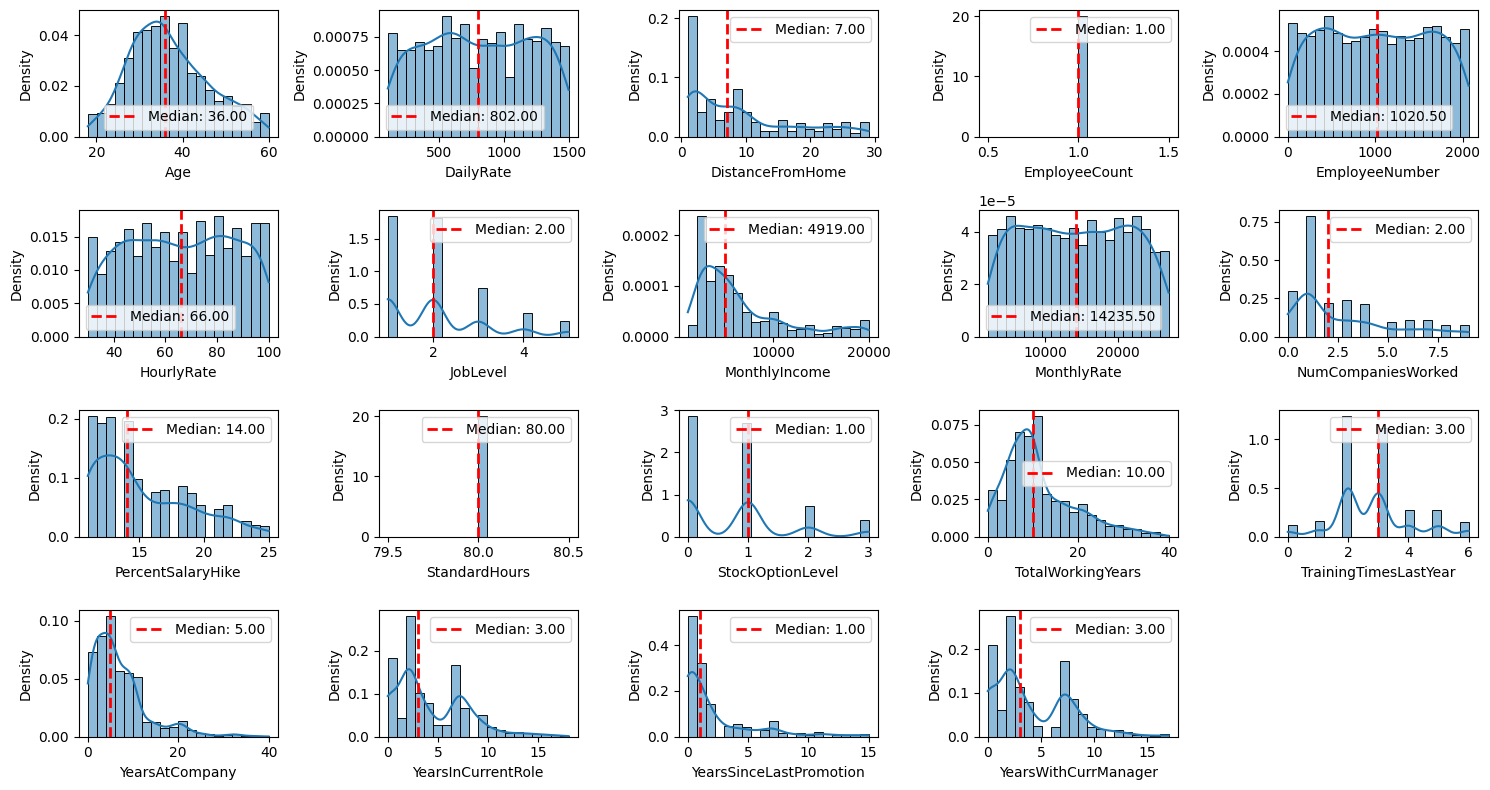

In [16]:
# Set the figure size for the histograms
fig_size_width = 15
fig_size_height = 2 * int(np.ceil(len(numeric_emp_df.columns) / 5))
plt.figure(figsize=(fig_size_width, fig_size_height))

# Number of rows/columns for the subplot
n_rows = int(np.ceil(len(numeric_emp_df.columns) / 5))
n_cols = 5

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_size_width, fig_size_height))

# Flatten the array of axes for easy indexing
axes = axes.ravel()

# Create a histogram for each numeric column
for i in range(n_rows * n_cols):
    if i < len(numeric_emp_df.columns):
        column = numeric_emp_df.columns[i]
        sns.histplot(emp_df[column], ax=axes[i], bins=20, edgecolor='black', kde=True, stat="density")
        median = emp_df[column].median()
        axes[i].axvline(median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
        axes[i].set_ylabel('Density')
        axes[i].legend()
    else:
        axes[i].axis('off')  # Hide empty subplots

# Adjust layout for better readability
plt.tight_layout()
plt.show()

A few observations from this plot:
- Age distribution is slightly right-skewed, indicating that there are more younger employees than older ones. The median age is 36.

- Distance From Home distribution is positively skewed, showing that most employees live relatively close to their workplace, with a median distance of 7.

- Monthly Income distribution is right-skewed, with the median monthly income at 4919, suggesting that higher incomes are less common.

- Num Companies Worked is positively skewed, with most employees having worked at 1 or 2 companies before, and a median of 2 companies.

- Percent Salary Hike distribution shows that most salary hikes are close to 14%, with the distribution skewed to the right.

- The distribution is right-skewed, with most employees having less than 10 years of total working experience, and a median of 10 years.

- Most employees received 2 or 3 training sessions last year, with a median of 3.

- Most employees having spent 5 years or less at the company, and a median of 5 years.

- Years In Current Role data is positively skewed, with most employees having spent 2 or 3 years in their current role, and a median of 3 years.

- Most employees having been with their current manager for 2 or 3 years, and a median of 3 years.

The histograms for `DailyRate`, `HourlyRate` and `MonthlyRate` are redundant since we will focus on `MonthlyIncome`. On the other hand, `EmployeeCount`, `JobLevel`, , `Over18`, `StandardHours` and `StockOptionLevel` columns suggest these fields don't vary and might not provide useful information for analysis. They could be candidates for removal if they do not hold relevance to the analysis objectives. `EmployeeNumber`, as it is a unique identifier for each employee, would be better set as an index for the dataset rather than used as a variable for analysis.

In [17]:
# Dropping `DailyRate`, `EmployeeCount`, `HourlyRate`, `JobLevel`, `MonthlyRate`, `Over18`, `StandardHours`, `StockOptionLevel` columns

drop_columns = ['DailyRate', 'EmployeeCount', 'HourlyRate', 'JobLevel', 'MonthlyRate', 'Over18', 'StandardHours', 'StockOptionLevel']

# Dropping the columns
emp_df = emp_df.drop(drop_columns, axis=1)

In [18]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   float64 
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   Department                1470 non-null   category
 4   DistanceFromHome          1470 non-null   float64 
 5   Education                 1470 non-null   float64 
 6   EducationField            1470 non-null   category
 7   EmployeeNumber            1470 non-null   float64 
 8   EnvironmentSatisfaction   1470 non-null   float64 
 9   Gender                    1470 non-null   category
 10  JobInvolvement            1470 non-null   float64 
 11  JobRole                   1470 non-null   category
 12  JobSatisfaction           1470 non-null   float64 
 13  MaritalStatus             1470 non-null   catego

## Conclusions
We've gained additional insights into our dataset, understanding its fundamental structure through descriptive statistics, and everything appears to be within the expected norms.

Subsequently, we've checked for columns of low relevance and determined that they should be dropped.

# Storing our clean dataset
Now that we have a clean data it is time to export it so that we dont have to make all these operations each time we want to work with the data.

In [19]:
# Save the cleaned employee DataFrame to a CSV file without the index
emp_df.to_csv('./data/employee_data_clean.csv', index=False)

# Create a dictionary with the data types of each column in the employee DataFrame
types = emp_df.dtypes

# Save the data types to a CSV file for later use
types.to_csv('./data/dtypes_employee_data_clean.csv')

# Load the data types from the CSV file and convert them into a dictionary
# The column names become the keys and their data types become the values
types = pd.read_csv('./data/dtypes_employee_data_clean.csv', index_col=0).to_dict()['0']

# Reload the employee DataFrame from the CSV file
emp_df = pd.read_csv('./data/employee_data_clean.csv')

# Iterate through the columns and set their data types according to the dictionary
for col, dtype in types.items():
    emp_df[col] = emp_df[col].astype(dtype)

# Display the information to validate
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   float64 
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   Department                1470 non-null   category
 4   DistanceFromHome          1470 non-null   float64 
 5   Education                 1470 non-null   float64 
 6   EducationField            1470 non-null   category
 7   EmployeeNumber            1470 non-null   float64 
 8   EnvironmentSatisfaction   1470 non-null   float64 
 9   Gender                    1470 non-null   category
 10  JobInvolvement            1470 non-null   float64 
 11  JobRole                   1470 non-null   category
 12  JobSatisfaction           1470 non-null   float64 
 13  MaritalStatus             1470 non-null   catego

In [20]:
# Let's see some random records
emp_df.sample(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1469,34.0,no,travel_rarely,research & development,8.0,3.0,medical,2068.0,2.0,male,4.0,laboratory technician,3.0,married,4404.0,2.0,no,12.0,3.0,1.0,6.0,3.0,4.0,4.0,3.0,1.0,2.0
767,37.0,no,travel_rarely,research & development,3.0,3.0,other,1062.0,4.0,female,3.0,healthcare representative,2.0,single,4107.0,3.0,no,15.0,3.0,1.0,8.0,3.0,2.0,4.0,3.0,0.0,1.0
267,25.0,no,non-travel,research & development,5.0,2.0,life sciences,369.0,2.0,male,4.0,healthcare representative,1.0,divorced,4000.0,1.0,no,12.0,3.0,4.0,6.0,2.0,3.0,6.0,3.0,1.0,5.0


# EDA (Exploratory Data Analysis)

### Understanding the demographic
Discretize the 'Age' column into age groups.

In [56]:
# Define bins and labels
bins = [18, 30, 40, 50,float('inf')]
labels = ['Young Adult (18-30)', 
          'Adult (30-40)', 'Middle Aged (40-50)', 
          'Senior (50+)']


In [57]:
# Discretize age (lowest value in interval included, highest value excluded)
emp_df['Age Group'] = pd.cut(emp_df['Age'], 
                bins=bins, labels=labels)
emp_df[['Age', 'Age Group']]

,Age,Age Group
0,41.0,Middle Aged (40-50)
1,49.0,Middle Aged (40-50)
2,37.0,Adult (30-40)
3,33.0,Adult (30-40)
4,27.0,Young Adult (18-30)
...,...,...
1465,36.0,Adult (30-40)
1466,39.0,Adult (30-40)
1467,27.0,Young Adult (18-30)
1468,49.0,Middle Aged (40-50)


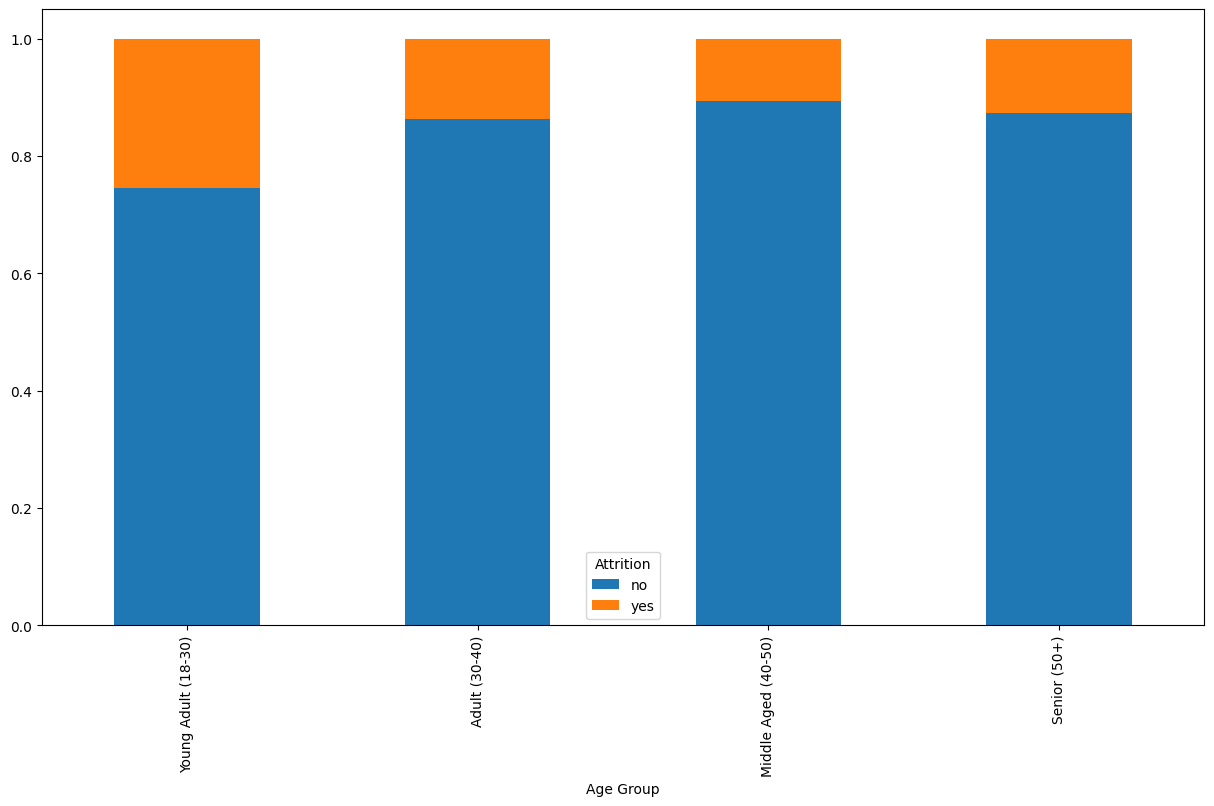

In [58]:
# Calculating proportions for each age group 
grouped = emp_df.groupby(['Age Group', 'Attrition']).size().unstack(fill_value=0) # Any missing value = 0
proportions = grouped.div(grouped.sum(axis=1), axis=0) #proportions by normalizing each row's values by the sum of its row
proportions

proportions.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.show()

The data presented in the barplot suggests a trend: as age increases, the proportion of individuals who leave decreases. This could imply that older individuals have more job stability, are more settled in their careers, or have stronger ties to the organization, which makes them less likely to leave. Conversely, younger individuals might be more transient, looking for better opportunities, or still exploring their career options.

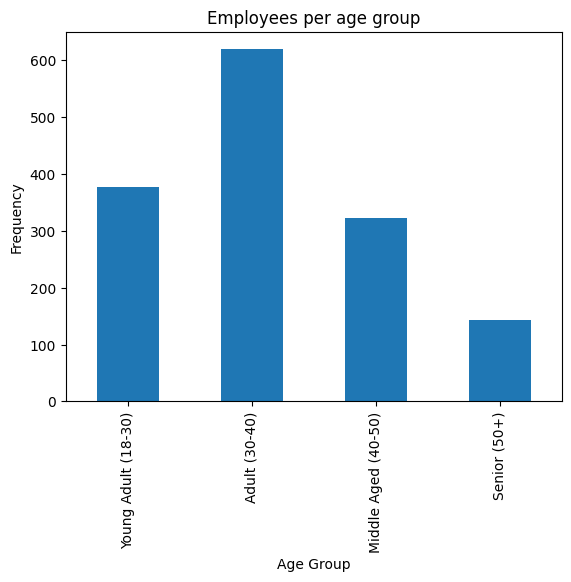

In [59]:
plt.title('Employees per age group')
grouped.sum(axis=1).plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Creating a DataFrame with the count of 'Attrition' values
employee_attrition = pd.DataFrame(emp_df['Attrition'].value_counts())
employee_attrition

,count
Attrition,
no,1233
yes,237


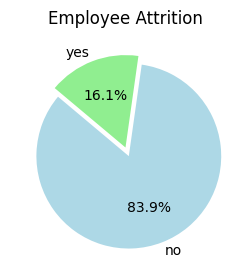

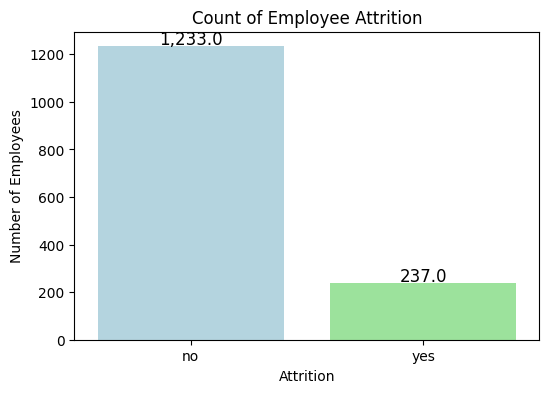

In [22]:
# Renaming the columns for clarity
employee_attrition.columns = ['Count']

# Preparing data for pie chart
labels = employee_attrition.index
sizes = employee_attrition['Count']
explode = (0.1, 0)  # Only explode the first slice ('No' is the first)
colors = ['lightblue', 'lightgreen']  # Custom colors for the slices

# Creating the pie chart with specified colors and settings
plt.figure(figsize=(4, 3))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Employee Attrition')
plt.show()

# Creating a count plot for the 'Attrition' column
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Attrition', data=emp_df, palette=colors)
plt.title('Count of Employee Attrition')
plt.ylabel('Number of Employees')

# Adding formatted count annotations on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

With 1233 (~83%) individuals marked as 'no', suggesting that the majority of individuals in this dataset have not left the organization.

## Most Popular Job Role

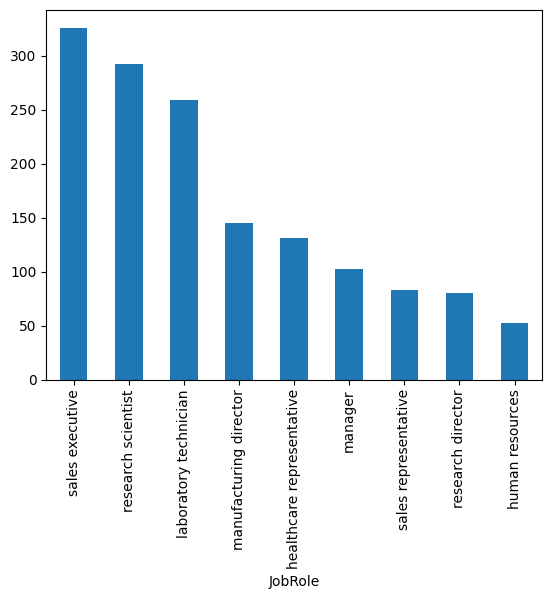

In [23]:
emp_df['JobRole'].value_counts().plot(kind='bar');

Sales executives role has the most employees. From this plot we can continue and see the distribution of distance from home for those working as sales executives

<Axes: >

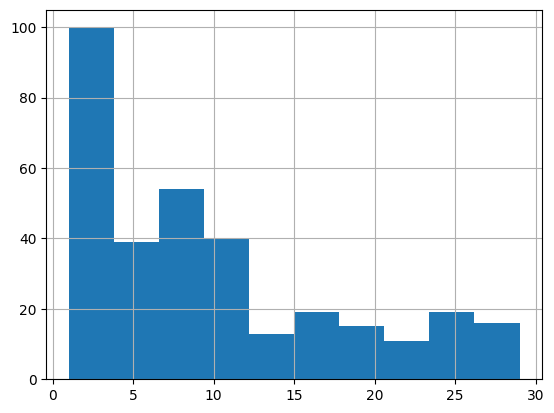

In [24]:
df_sales_exec=emp_df[emp_df["JobRole"]=="sales executive"]
df_sales_exec['DistanceFromHome'].hist()

## Employees by Education Background

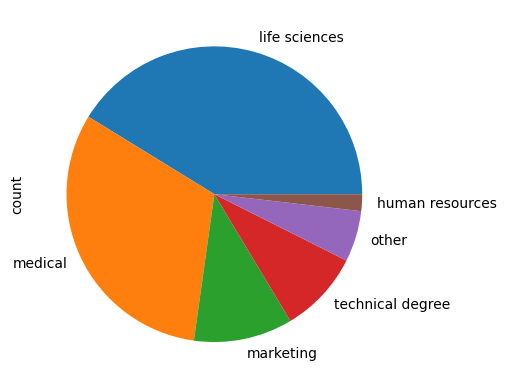

In [25]:
emp_df['EducationField'].value_counts().plot(kind='pie');

Here we see medical and life sciences dominate all other categories most employees are working as sales executives, IBM being a tech company, it is intersting to see less employees with a technical degree as compared to the top 2.

This could be because:

**Diversification of Tech Company Portfolios:** Large tech companies like IBM often diversify their services and products beyond traditional technology offerings. For example, IBM has divisions dedicated to healthcare technology, bioinformatics, and life sciences research. Employees with medical and life science backgrounds are essential to these areas.

**Data Science and Artificial Intelligence:** Fields like genomics, pharmaceuticals, and healthcare increasingly rely on data science and AI, areas where tech companies like IBM are at the forefront. Employees with medical or life science backgrounds, combined with skills in data analysis or computational modeling, are highly valuable in these interdisciplinary fields.

**Healthcare Technology Solutions:** IBM provides various healthcare solutions and services, including cognitive systems that support clinical decisions, electronic health records, and research in personalized medicine. Such endeavors require expertise in life sciences and medical fields.

## Correlation Matrix

<Axes: >

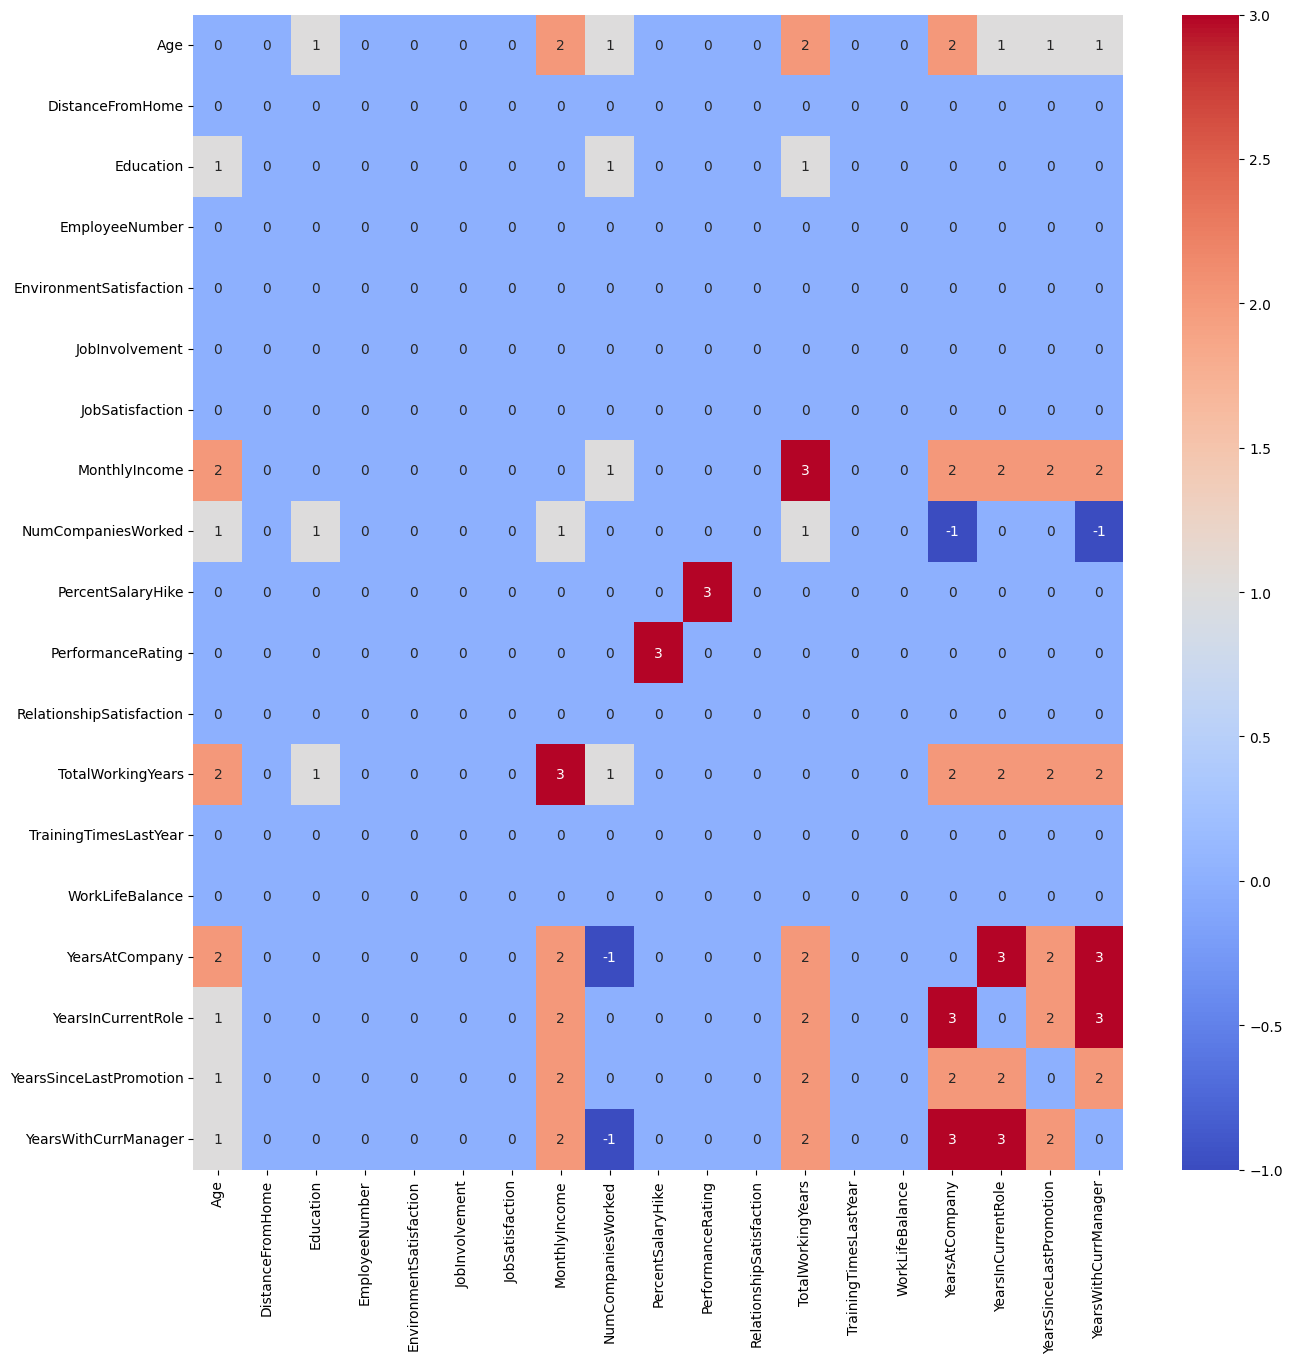

In [26]:
corr_emp=emp_df.select_dtypes(np.number).corr()
levels_corr=np.zeros(shape=corr_emp.shape)

levels=np.arange(-3,4)
ranges=[(-1,-0.7),(-0.7,-0.4),(-0.4,-0.1),(-0.1,0.1),(0.1,0.3),(0.3,0.7),(0.7,1)]

for i,r in enumerate(ranges):
    lower,upper=r
    levels_corr[(corr_emp>=lower) & (corr_emp<upper)] =levels[i]

levels_corr=pd.DataFrame(data=levels_corr,index=corr_emp.index,columns=corr_emp.columns)

plt.figure(figsize=(15,15))
sns.heatmap(levels_corr, annot=True, cmap='coolwarm')

Some interesting correlations:

- Monthly Income: This variable shows a strong positive correlation (marked as '3') with JobLevel and TotalWorkingYears, which makes intuitive sense as more experienced employees or those in higher job levels tend to earn more.

- Percent Salary Hike and Performance Rating: There seems to be a strong positive correlation between these two, suggesting that higher performance ratings are associated with larger salary increases.

- Years at Company: This shows a positive correlation with variables such as YearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrManager, indicating that as employees spend more time with the company, they also tend to stay longer in their roles, with their current manager, and since their last promotion.

- Total Working Years: Aside from Monthly Income, this variable also has a strong positive correlation with Age, suggesting that older employees have generally worked more years, which is expected.

Lack of Correlation: There are many '0's on the heatmap, indicating a lack of correlation between many pairs of variables. For example, variables such as DailyRate, DistanceFromHome, and Education do not seem to have a strong correlation with other variables. All of the other correlations are weak in either direction

## Boxplots for Employee Satisfaction Indicators

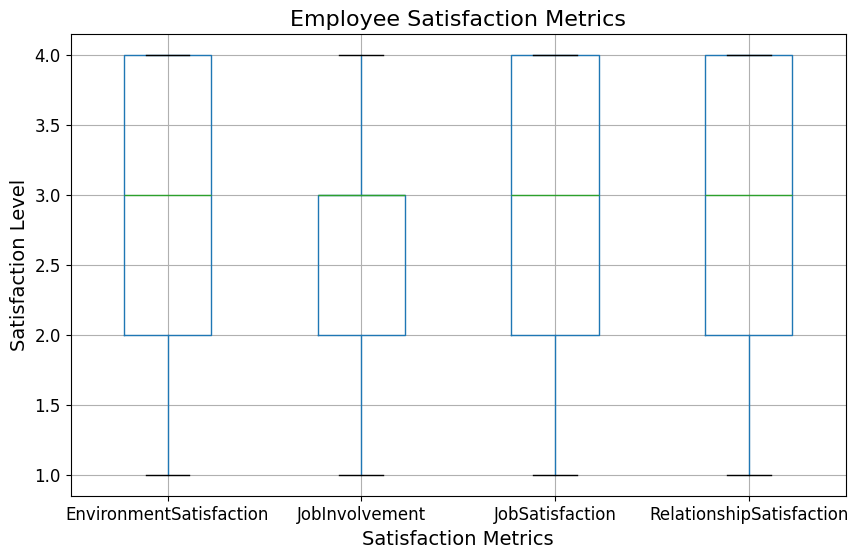

In [27]:
# creating a boxplot for the employee satisfaction metrics
plt.figure(figsize=(10, 6))
boxplot = emp_df[['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction']].boxplot()

# Enhance visual appeal
boxplot.set_title('Employee Satisfaction Metrics', fontsize=16)
boxplot.set_ylabel('Satisfaction Level', fontsize=14)
boxplot.set_xlabel('Satisfaction Metrics', fontsize=14)
boxplot.tick_params(labelsize=12)

# Assign colors to each boxplot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for patch, color in zip(boxplot.artists, colors):
    patch.set_facecolor(color)

plt.show()

- The median values for Environment Satisfaction, Job Involvement, Job Satisfaction, and Relationship Satisfaction are around the middle of the scale, suggesting that, on average, employees feel medium to high satisfaction and involvement in their jobs and relationships at work.
- A narrow box for Job Satisfaction would suggest that most employees' satisfaction levels are clustered around the median.
- Absence of outliers in the boxplot indicates that there are no extreme opinions that fall outside the typical range of responses for these variables.

## Relationship Between Attrition, Age and Employee Satisfaction

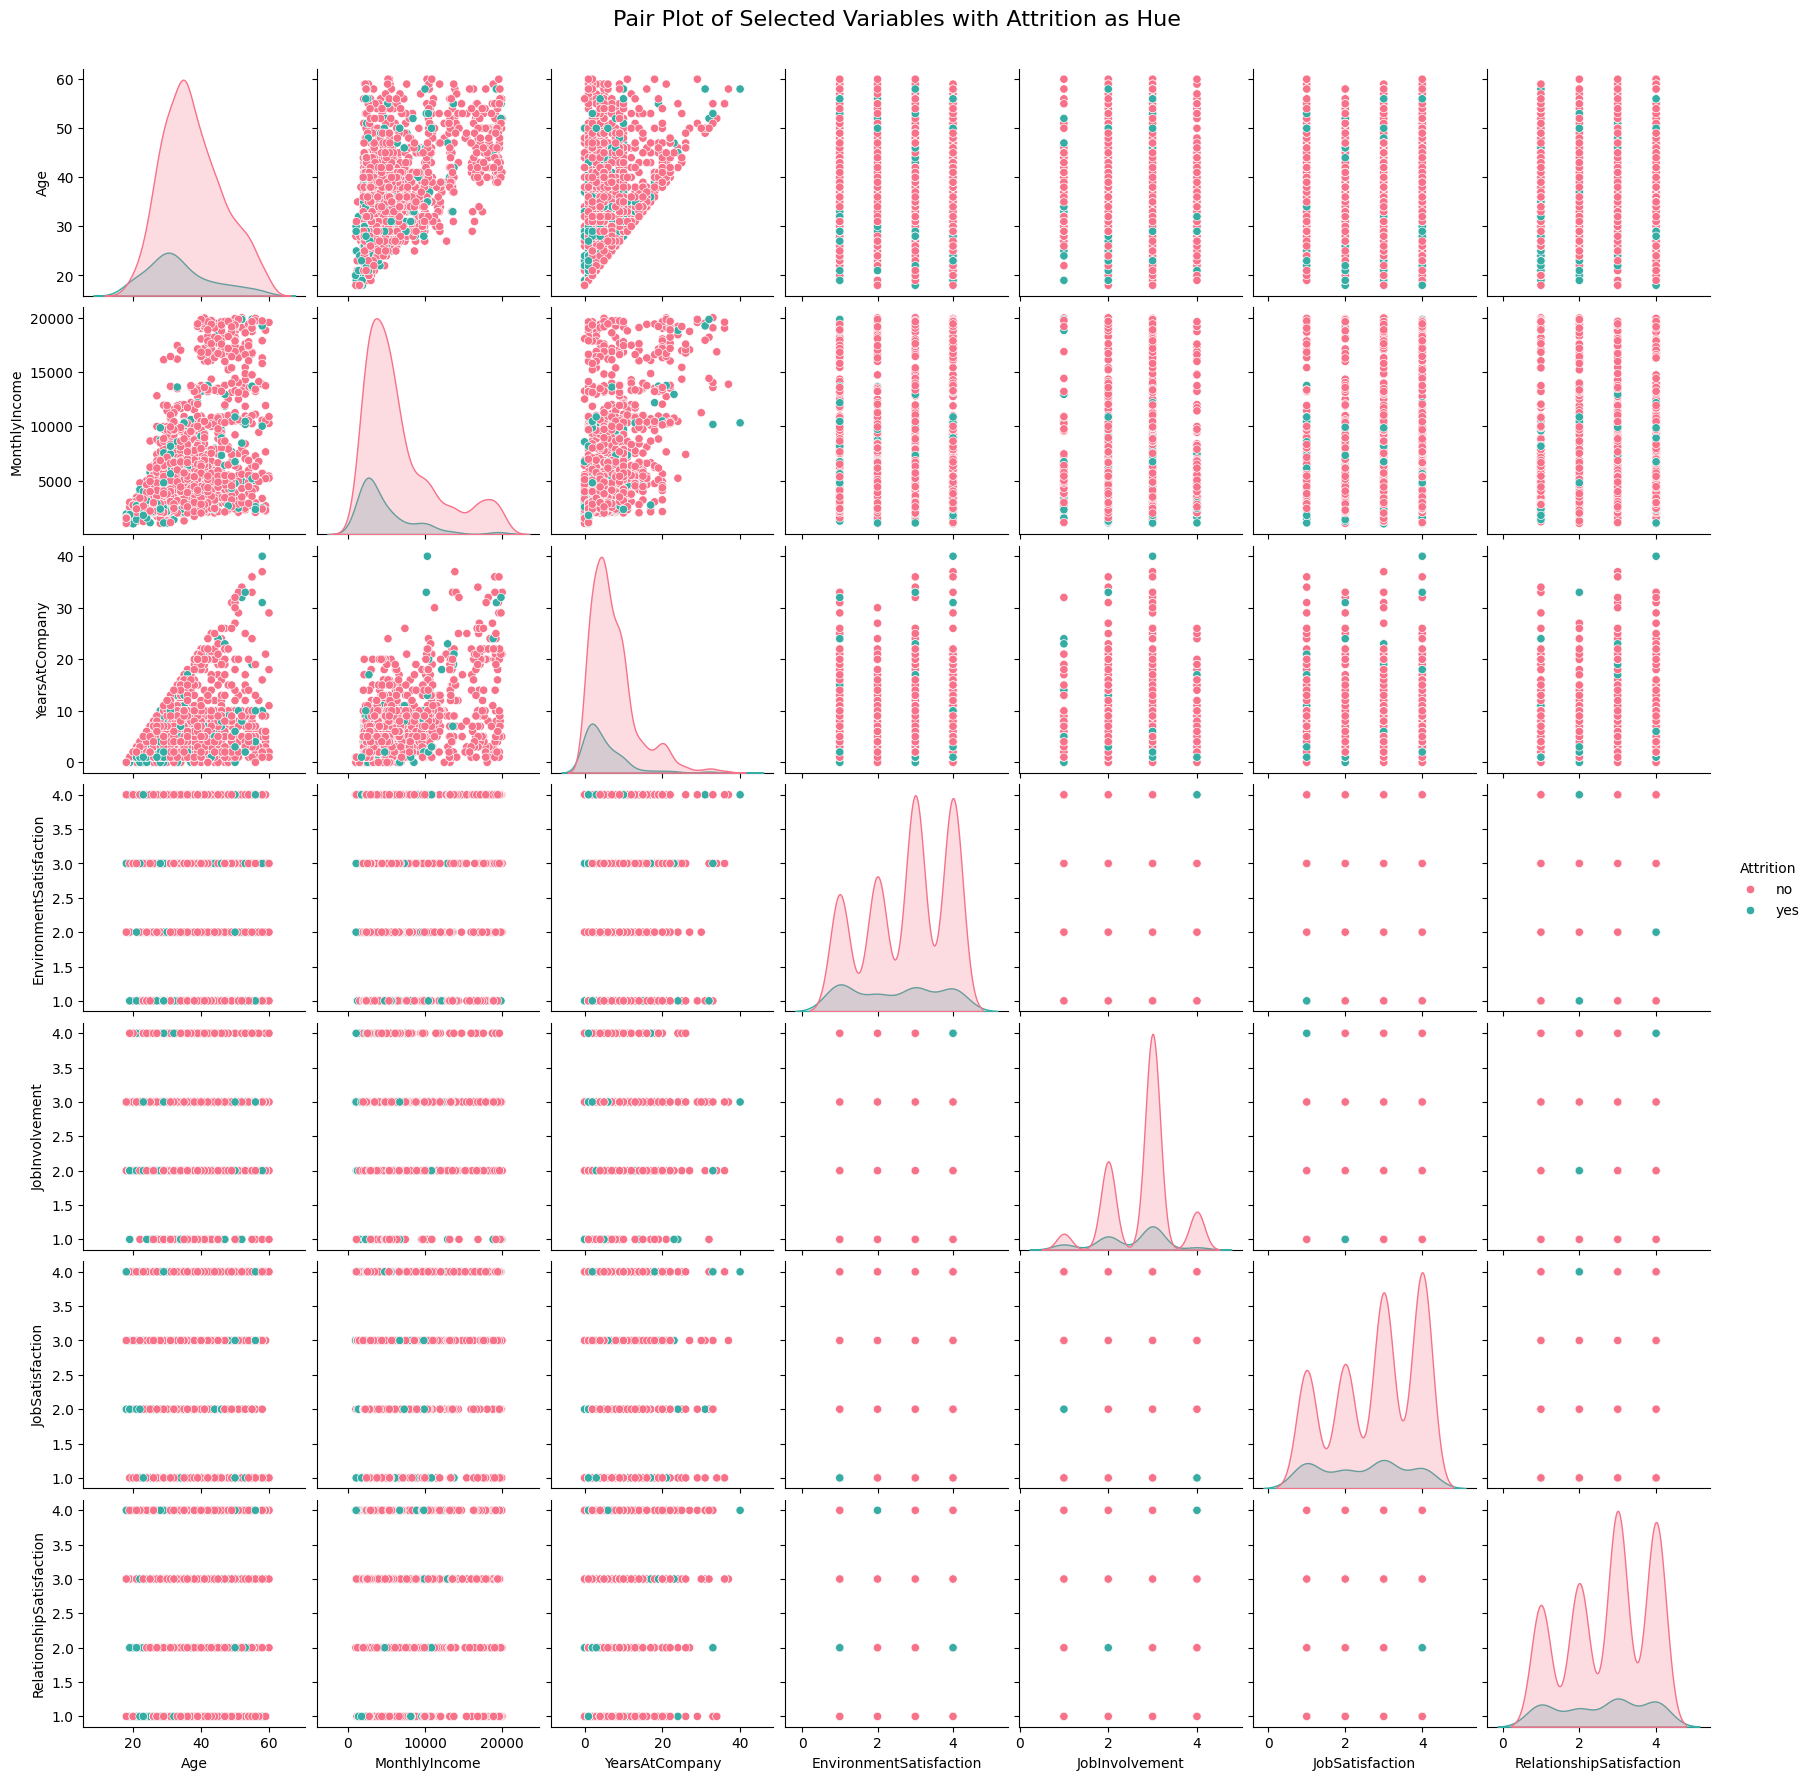

In [28]:
# Selecting a subset of columns for the pair plot
columns_for_pairplot = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'Attrition', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction']

# Creating pair plots
sns.pairplot(emp_df[columns_for_pairplot], hue='Attrition', diag_kind='kde', palette='husl')
plt.suptitle('Pair Plot of Selected Variables with Attrition as Hue', size=16, y=1.02)
plt.show()

Since the values for the employee satisfaction scores are ordinal, they appear as a grid. We will need to refine this analysis to say more about the data.

Some key observations for relationships between 'Age', 'Monthly Income', 'Years at the Company', 'Job Satisfaction', and 'Attrition':

- Age and Attrition: Younger employees seem to have higher attrition rates.
- Monthly Income and Attrition: Lower monthly income is associated with higher attrition.
- Years at the Company and Attrition: Employees with fewer years at the company tend to have higher attrition rates.
- Job Satisfaction: Higher attrition is visible among employees with lower job satisfaction levels.


# Pivoting

In [29]:
# Columns to melt 
emp_satis_cols = ['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction']

# Melting the data
melted_data = emp_df.melt(id_vars=['EmployeeNumber'], 
                    value_vars=emp_satis_cols, 
                var_name='Indicator', value_name='value')
melted_data

,EmployeeNumber,Indicator,value
0,1.0,EnvironmentSatisfaction,2.0
1,2.0,EnvironmentSatisfaction,3.0
2,4.0,EnvironmentSatisfaction,4.0
3,5.0,EnvironmentSatisfaction,4.0
4,7.0,EnvironmentSatisfaction,1.0
...,...,...,...
5875,2061.0,RelationshipSatisfaction,3.0
5876,2062.0,RelationshipSatisfaction,1.0
5877,2064.0,RelationshipSatisfaction,2.0
5878,2065.0,RelationshipSatisfaction,4.0


In [30]:
count_values=melted_data[['Indicator','value']].value_counts()
count_values= pd.DataFrame(count_values).reset_index()
count_values

,Indicator,value,count
0,JobInvolvement,3.0,868
1,JobSatisfaction,4.0,459
2,RelationshipSatisfaction,3.0,459
3,EnvironmentSatisfaction,3.0,453
4,EnvironmentSatisfaction,4.0,446
5,JobSatisfaction,3.0,442
6,RelationshipSatisfaction,4.0,432
7,JobInvolvement,2.0,375
8,RelationshipSatisfaction,2.0,303
9,JobSatisfaction,1.0,289


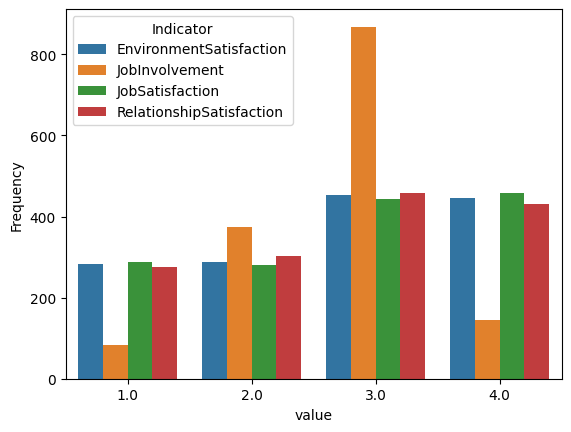

In [31]:
pivot_count=pd.pivot_table(data=melted_data,
        index=['Indicator','value'],aggfunc='count').reset_index()

sns.barplot(data=pivot_count,x='value',y='EmployeeNumber',
            hue='Indicator')
plt.ylabel('Frequency')
plt.show()

Some insights that can be drawn:

- Job Involvement has a noticeably high frequency at the level of 3.0 (High), suggesting that employees generally feel highly involved in their jobs.
- Environment Satisfaction shows a relatively even distribution across the levels, with no single level appearing to be significantly more common than the others.
- Job Satisfaction and Relationship Satisfaction seem to have a similar pattern, with the highest frequency at the level of 4.0 (Very High), indicating that employees are, on average, very satisfied with their job and workplace relationships.

Given that Job Involvement is already high, the company could aim to further this positive trend by investing in comprehensive employee development programs, such as Career Advancement Tracks, Skill Development Workshops, Mentorship Programs, Recognition Programs.

Additionally, since the highest satisfaction level (4.0) is most frequent for Job Satisfaction and Relationship Satisfaction, the company should also Maintain and Reinforce Company Culture and Values by Regular Feedback Mechanisms, Work-Life Balance Initiatives, Community Building Events.

# Job Role and Employee Satisfaction

We will now delve into an analysis to determine if there's a correlation between a job role and their level of satisfaction. This exploration is crucial for our hypothesis, as it can reveal valuable insights into employee preferences and guide us in tailoring our employee engagements more effectively

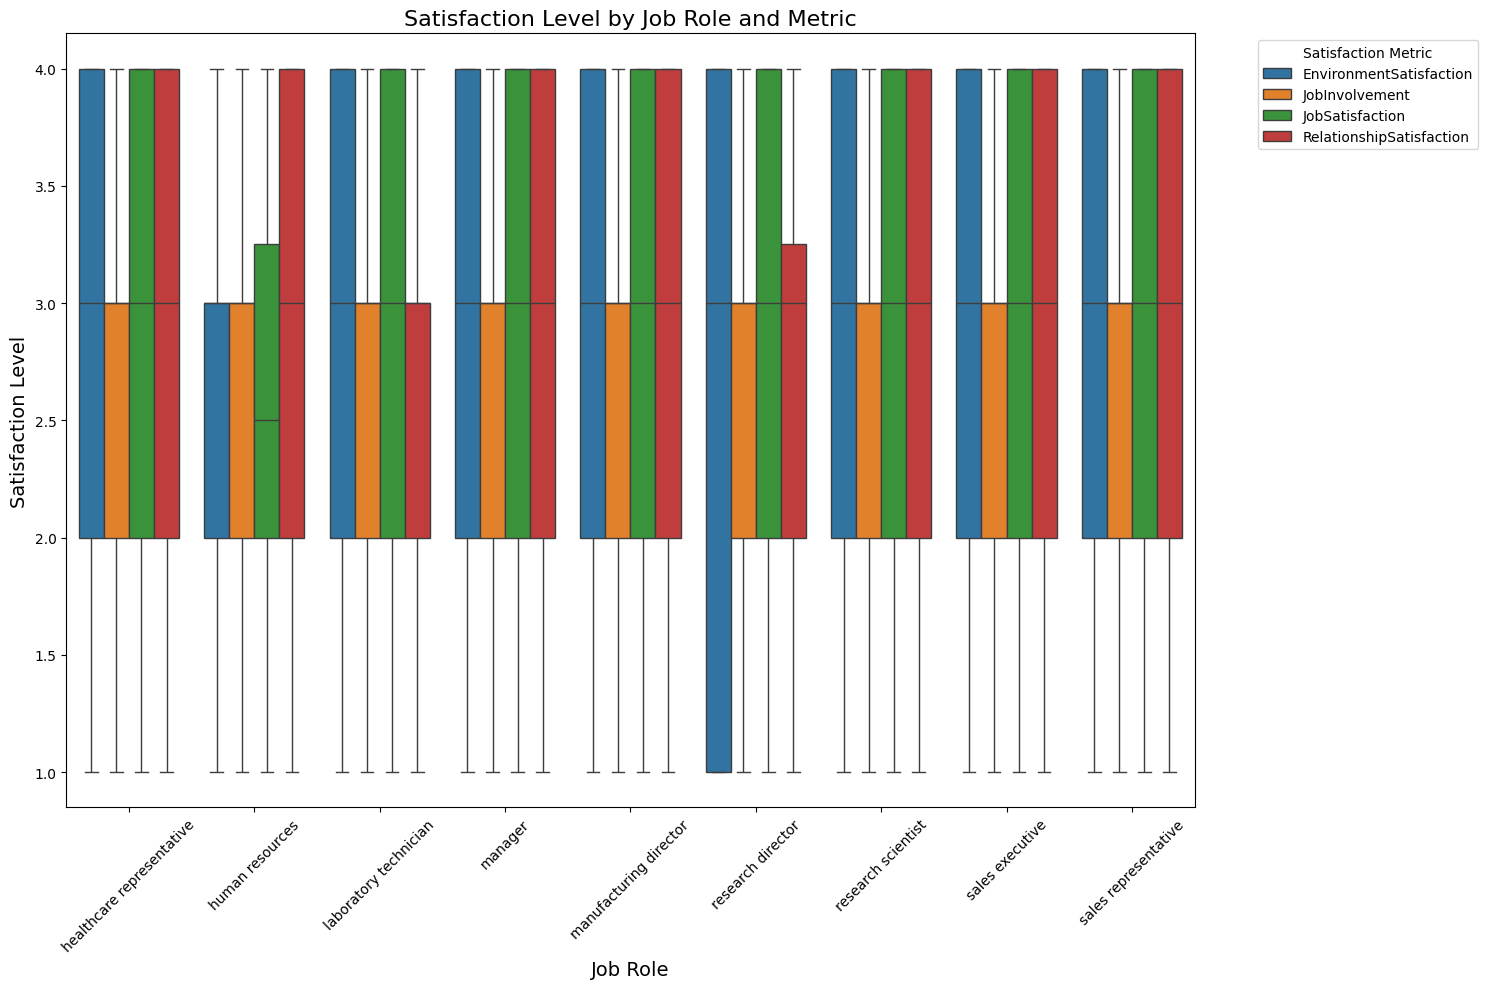

In [32]:
# Reshaping the data
tidy_format = pd.melt(emp_df, id_vars='JobRole', 
            value_vars=['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction'], 
            var_name='Satisfaction Metric', value_name='Level')

# Calculating the median level of satisfaction for each role and metric for sorting
satis_median_level = tidy_format.groupby(['JobRole', 'Satisfaction Metric'])['Level'].median().reset_index()

# Sorting roles based on the highest median level of satisfaction across all metrics
sorted_roles = satis_median_level.groupby('JobRole')['Level'].median().sort_values(ascending=False).index

# Creating box plots
plt.figure(figsize=(15, 10))
boxplot = sns.boxplot(x='JobRole', y='Level', 
    hue='Satisfaction Metric', data=tidy_format, order=sorted_roles)

# Enhancing plot aesthetics
plt.title('Satisfaction Level by Job Role and Metric', fontsize=16)
plt.xlabel('Job Role', fontsize=14)
plt.ylabel('Satisfaction Level', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Satisfaction Metric', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()  # Adjust layout

plt.show()


It seems Job Involvement and Satifscation are fairly consistent across all job roles. Research directors on average report a lower realtionship satisfaction as compared to other roles. On the other hand, environment satisfaction for Human resources is lower than other roles and can be investigated.

## Correlations between Job Satisfaction Metrics

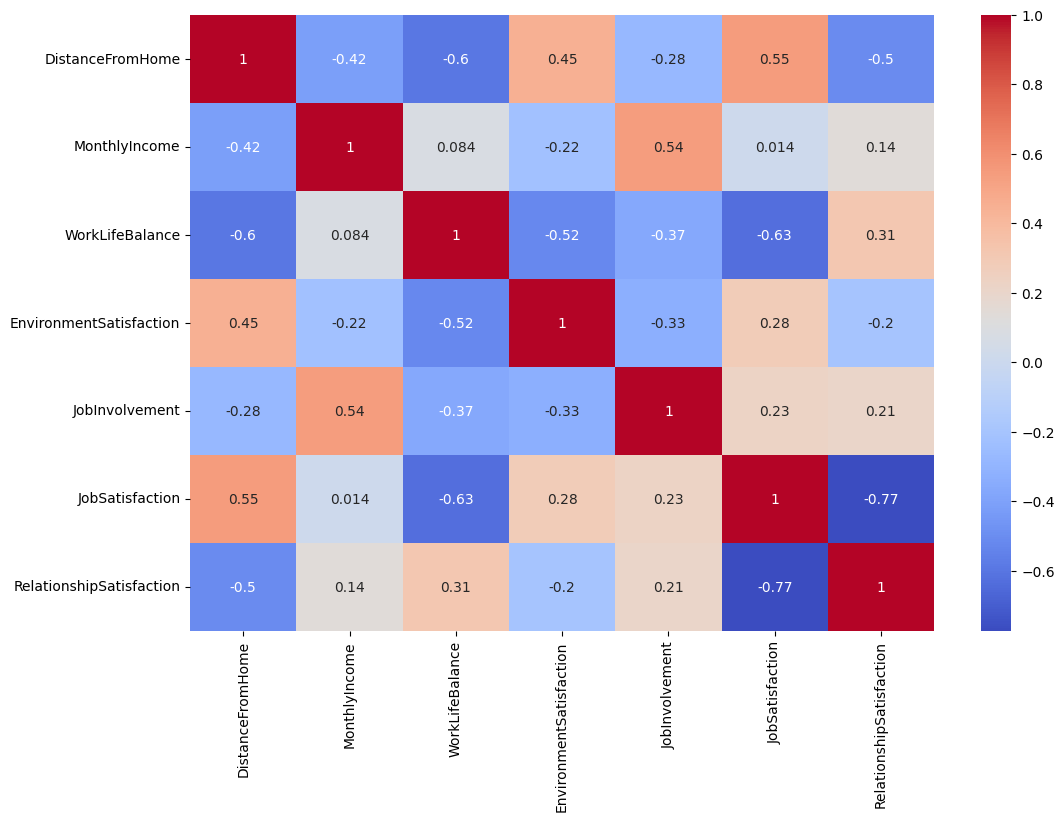

In [33]:
# We need to create a new dataframe that aggregates the necessary data
job_satis_corr = emp_df.groupby('JobRole')[['DistanceFromHome', 'MonthlyIncome', 'WorkLifeBalance',
                                            'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction']].mean()

# Creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(job_satis_corr.corr(), annot=True, cmap='coolwarm')
plt.show()

Key Observations:

- DistanceFromHome: There's a strong negative correlation (-0.6) with WorkLifeBalance, suggesting that employees who live further from work tend to report a poorer work-life balance.
    - A strong negative correlation between DistanceFromHome and WorkLifeBalance may warrant considering flexible working arrangements for those living far from the office.
- MonthlyIncome seems to have a moderate positive correlation (0.54) with JobInvolvement, indicating that higher income might be associated with higher job involvement.
   - The positive correlation between MonthlyIncome and JobInvolvement could be used to argue for competitive compensation as a means of increasing employee engagement.
- EnvironmentSatisfaction: a moderate positive correlation with JobSatisfaction (0.28), but a negative correlation with WorkLifeBalance (-0.52), which could imply that even if employees are satisfied with their environment, their work-life balance may not be as favorable.
    - The negative correlation between EnvironmentSatisfaction and WorkLifeBalance may suggest a need to delve deeper into what aspects of the environment are impacting work-life balance negatively.
- JobSatisfaction and RelationshipSatisfaction show a strong negative correlation (-0.77) with each other, which is counterintuitive as one might expect these to be positively correlated.
    - The strong negative correlation between JobSatisfaction and RelationshipSatisfaction is unusual and could suggest a more complex relationship that requires further investigation.



 # Influence of Work Environment and Job Satisfaction on Attrition
 
We'll start by examining how work environment and job satisfaction influence attrition. We will compare the average scores of these factors between employees who left and those who stayed.

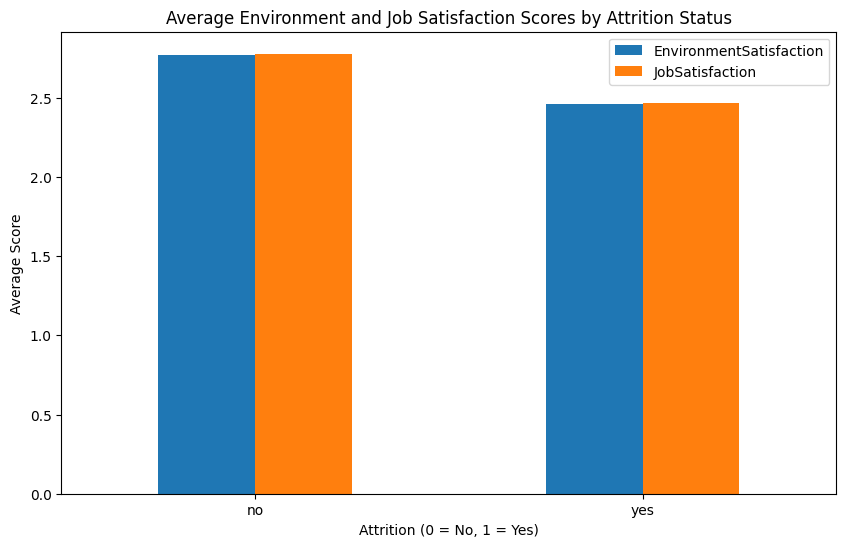

In [34]:
# Grouping by Attrition status in emp_df and calculating mean for EnvironmentSatisfaction and JobSatisfaction
attrition_group = emp_df.groupby('Attrition')[['EnvironmentSatisfaction', 'JobSatisfaction']].mean()

# Plotting
attrition_group.plot(kind='bar', figsize=(10, 6))
plt.title('Average Environment and Job Satisfaction Scores by Attrition Status')
plt.ylabel('Average Score')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.xticks(rotation=0)
plt.show()


# Assessing the Role of Work-Life Balance

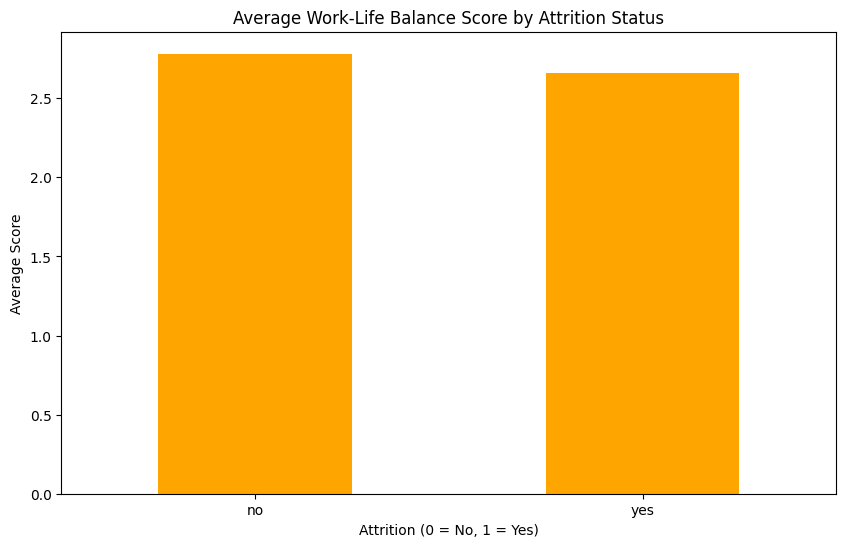

In [35]:
# Grouping by Attrition status in emp_df and calculating mean for WorkLifeBalance
worklife_balance_group = emp_df.groupby('Attrition')['WorkLifeBalance'].mean()

# Plotting
worklife_balance_group.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Average Work-Life Balance Score by Attrition Status')
plt.ylabel('Average Score')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.xticks(rotation=0)
plt.show()


# Analyzing Distance from Home and Attrition

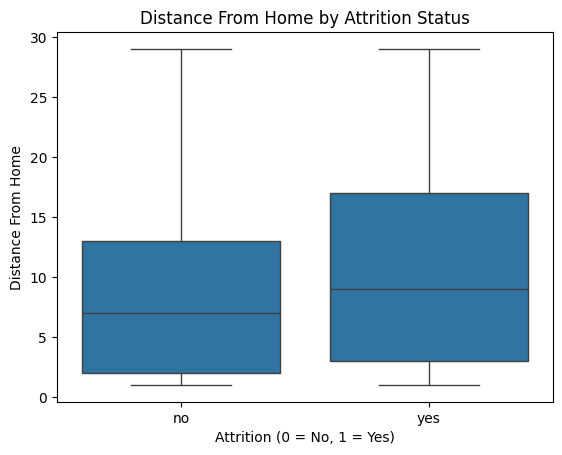

In [36]:
# Visualizing the distribution of DistanceFromHome by Attrition status in emp_df
sns.boxplot(x='Attrition', y='DistanceFromHome', data=emp_df)
plt.title('Distance From Home by Attrition Status')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Distance From Home')
plt.show()


# Educational Background and Attrition

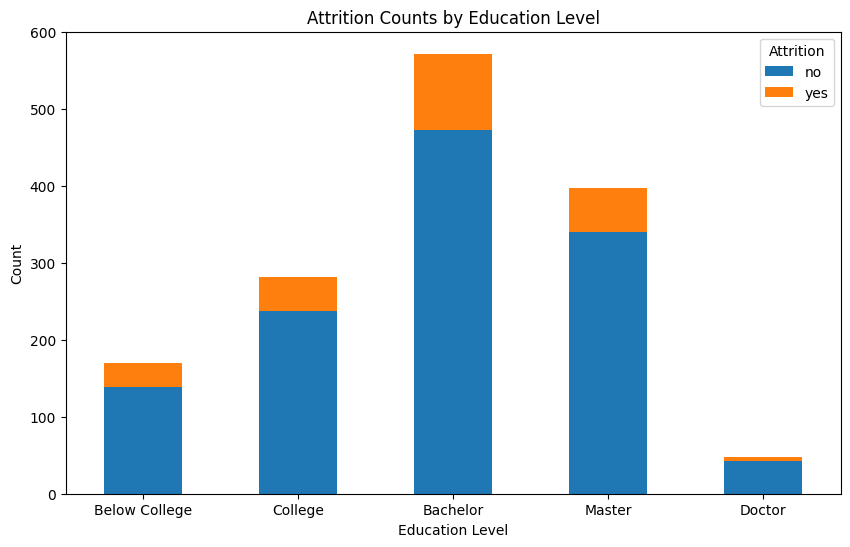

In [37]:
# Grouping by Education and Attrition status in emp_df and calculating the count
education_attrition = emp_df.groupby(['Education', 'Attrition']).size().unstack()

# Plotting
education_attrition.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Attrition Counts by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Below College', 'College', 'Bachelor', 'Master', 'Doctor'], rotation=0)
plt.show()


it appears that individuals with a Bachelor's level of education have the highest count of attrition compared to other education levels. Implementing targeted retention strategies for employees with a Bachelor's degree, potentially including career development programs, to address the higher attrition rates observed within this educational demographic

# Investigating Other Contributing Factors

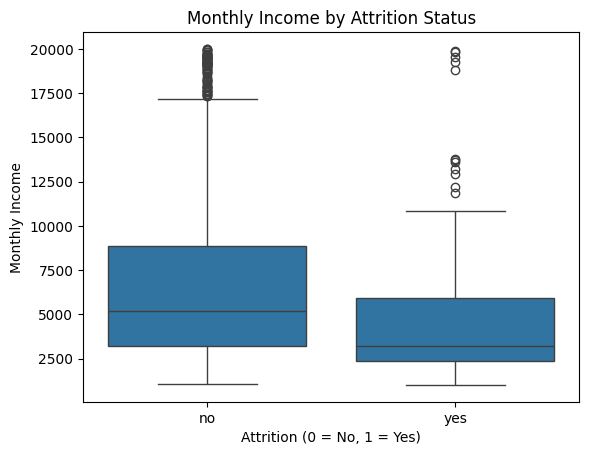

In [38]:
# For instance, analyzing MonthlyIncome in emp_df
sns.boxplot(x='Attrition', y='MonthlyIncome', data=emp_df)
plt.title('Monthly Income by Attrition Status')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Monthly Income')
plt.show()

## T-Test

**COMPARING Average Distance from Home Between Two Job Roles (sales representatives (max employees) and human resources (min employees)**
- Null Hypothesis (H0): There is no significant difference in average distance from home between employees from two job roles.
- Alternative Hypothesis (H1): There is a significant difference in average distance from home between employees from two job roles.

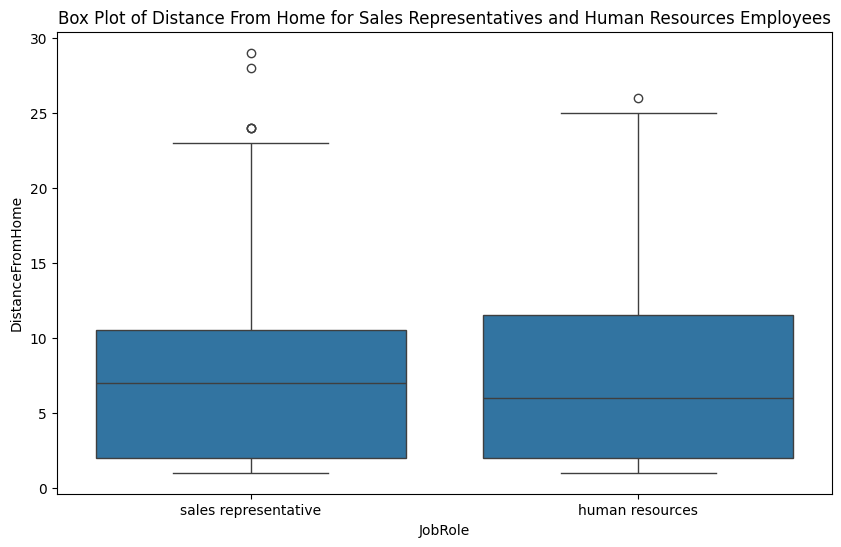

The p-value of the statistical test is: 
0.715


In [39]:
# Selecting two genres for the T-Test: Sales Representatives and Human Resources
salesrep_dist = emp_df[emp_df['JobRole'] == 'sales representative']['DistanceFromHome']
hr_dist = emp_df[emp_df['JobRole'] == 'human resources']['DistanceFromHome']

# Performing a T-Test
t_test_result = stats.ttest_ind(salesrep_dist, hr_dist, nan_policy='omit')

# Visualization: Box plot for Sales Representatives and Human Resources employees
plt.figure(figsize=(10, 6))
data_obj=emp_df[emp_df['JobRole'].isin(['sales representative', 'human resources'])]
data_obj['JobRole']=data_obj['JobRole'].astype(object) # We will make this change only to show a better visualizations. Otherwise we would get all categories in the boxplot
sns.boxplot(x='JobRole', y='DistanceFromHome', data=data_obj)
plt.title('Box Plot of Distance From Home for Sales Representatives and Human Resources Employees')
plt.show()

# T-Test Result
print(f'The p-value of the statistical test is: \n{t_test_result[1]:3.3f}')

**Decision:**
- Since the p-value is higher than the common alpha level of 0.05, we do not have sufficient evidence to reject the null hypothesis. Therefore, we cannot conclude that there is a significant difference in average distance from home for employees in sales representative and human resources roles.

## Chi-Square Test

**ASSOCIATION Between 'Job Roles' and 'Attrition'**
- Null Hypothesis (H0): There is no association between job roles and attrition.
- Alternative Hypothesis (H1): There is an association between job roles and attrition.

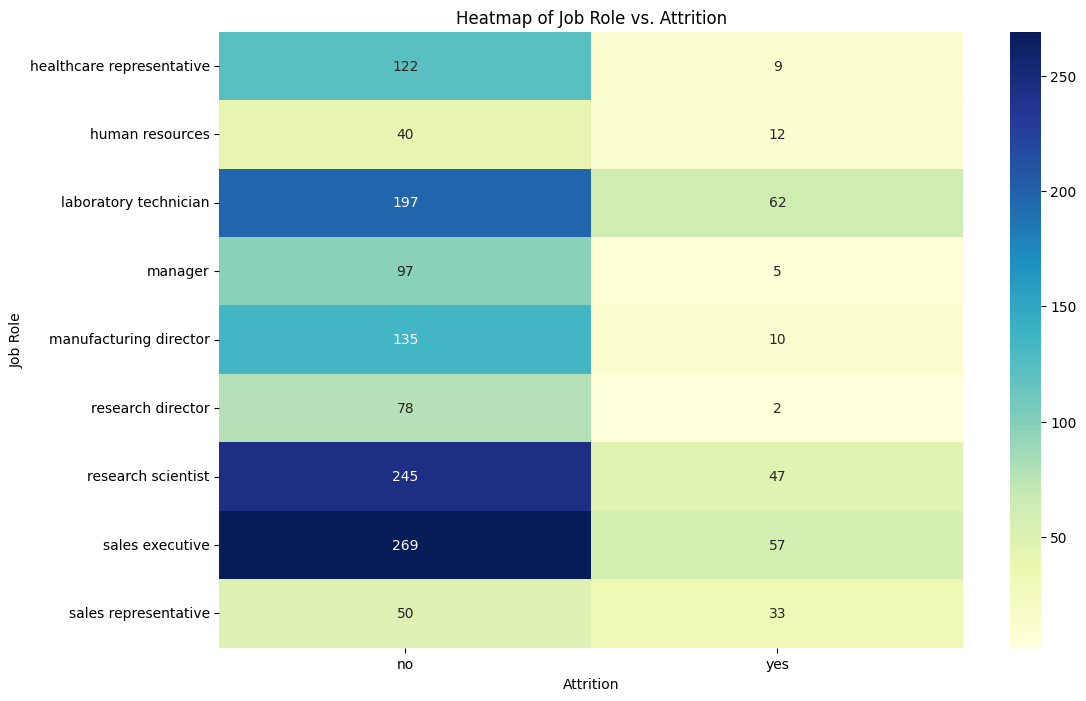

Chi-Square Statistic: 86.19025367670434
P-value: 2.7524816380506567e-15
Degrees of Freedom: 8
Expected Frequencies:
[[109.87959184  21.12040816]
 [ 43.61632653   8.38367347]
 [217.24285714  41.75714286]
 [ 85.55510204  16.44489796]
 [121.62244898  23.37755102]
 [ 67.10204082  12.89795918]
 [244.92244898  47.07755102]
 [273.44081633  52.55918367]
 [ 69.61836735  13.38163265]]


In [40]:
# Preparing data for the Chi-Square Test
contingency_table = pd.crosstab(emp_df['JobRole'], emp_df['Attrition'])

# Performing Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Visualization: Heatmap of the contingency table
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Heatmap of Job Role vs. Attrition')
plt.ylabel('Job Role')
plt.xlabel('Attrition')
plt.show()

# Chi-Square Test Result
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)


**Result Interpretation:**
- **Statistic**: The Chi-Square statistic is approximately 86.19, suggesting a greater difference between observed and expected values.
- **P-Value**: In this case, the p-value is extremly low , suggesting that the observed frequencies are staistically significantly different from the expected frequencies.

**Decision:**
- Since our Chi-Square is pretty high and the p-value is extremly low compared to alpha level of 0.05, we reject the null hypothesis. Thus, we can conclude that there is a significant association between job role and attrition.

**Visualization:**
- The heatmap shows the frequency of responses for each combination of 'Job Roles' and 'Attrition'.

## 3. Correlation Analysis
**CORRELATION Between Age and Monthly Income**
- Null Hypothesis (H0): There is no correlation between age and monthly income.
- Alternative Hypothesis (H1): There is a correlation between age and monthly income.

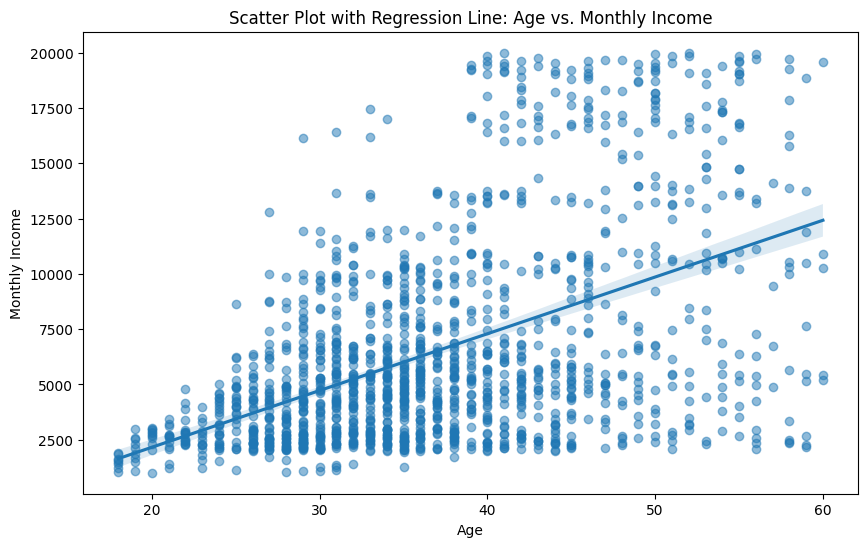

,Age,MonthlyIncome
Age,1.000000,0.497855
MonthlyIncome,0.497855,1.000000


In [41]:
# Preparing data for Correlation Analysis
# Filtering out rows with missing values in 'Age' or 'Monthly Income'
cleaned_data = emp_df[['Age', 'MonthlyIncome']].dropna()

# Performing Correlation Analysis
correlation_result = cleaned_data.corr(method='pearson')

# Visualization: Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='MonthlyIncome', data=cleaned_data, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot with Regression Line: Age vs. Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()

# Correlation Result
correlation_result

**Result Interpretation:**
- The correlation coefficient between "Age" and "Monthly Income" is approximately 0.497855. 
- This value indicates a positive correlation, suggesting that as age increases, the monthly income increases.

**Visualization:**
- The scatter plot with a regression line visually represents the relationship between age and monthly income. The spread of the points and the near-horizontal regression line positive relationship between the two variables.

**Conclusion:**
- The positive correlation coefficient, along with the visualization, suggests that age is a predictor of monthly income, also implying a linear relationship between these two variables.

# Advanced PREDICTIVE analytic techniques

# Regression Analysis
Null Hypothesis (H0): There is no relationship between the age and the monthly income.
Alternative Hypothesis (H1): There is a significant relationship between the predictor variables and the monthly income.

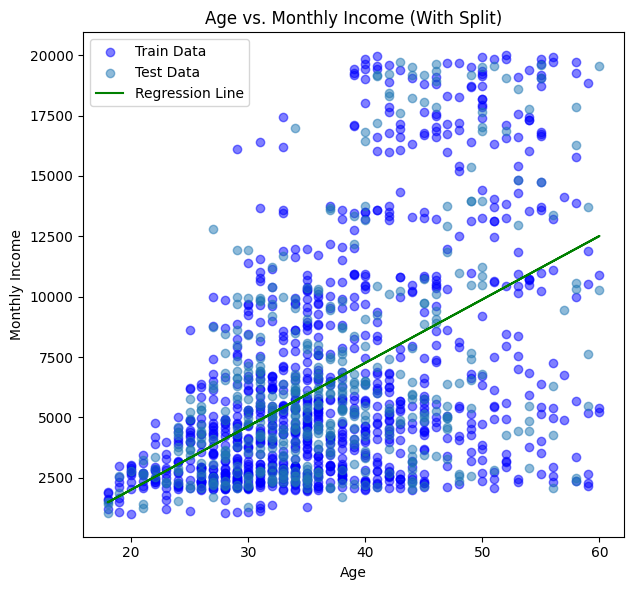

In [42]:
# Regression with train-test split

# Regression with Age and Monthly Income
X = emp_df[['Age']].dropna()
y = emp_df['MonthlyIncome'].dropna()
X, y = X.align(y, axis=0, join='inner')

# Splitting the dataset for regression
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=0.3, random_state=42)


# Creating and training the regression models
model_split = LinearRegression()
model_split.fit(X_train_split, y_train_split)


# Predicting 'Monthly Income' for the test data
y_pred_split = model_split.predict(X_test_split)

# 2D Plot for regression with train-test split
plt.figure(figsize=(12, 6))

# Plot
plt.subplot(1, 2, 1)
plt.scatter(X_train_split, y_train_split,color='blue', alpha=0.5, label='Train Data')
plt.scatter(X_test_split, y_test_split, alpha=0.5, label='Test Data')
plt.plot(X_test_split, y_pred_split, 'r-', label='Regression Line',color='green')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.title('Age vs. Monthly Income (With Split)')
plt.legend()

plt.tight_layout()
plt.show()

## Logistic regression to predict whether a person is will leave based on features such as Age, Monthly Income, and Job Role, Years at Company, Years in Current Role.

In [43]:
emp_data_1=emp_df.copy()

# Let's predict whether a person will leave or not based on Age, Monthly Income, Total Working Years, Years at Company and Job Role
emp_data_1['Attrition'] = emp_df['Attrition'].map({'yes': 1, 'no': 0})  # Convert to binary
emp_data_1 = pd.get_dummies(emp_df, columns=['JobRole'])  # One-hot encoding for 'Fav genre'

# Selecting predictor variables and target variable
X = emp_data_1[['Age', 'TotalWorkingYears', 'YearsAtCompany', 'JobSatisfaction'] + [col for col in emp_data_1 if col.startswith('JobRole')]].dropna()
y = emp_data_1['Attrition'].dropna()

# Ensuring the lengths of X and y are the same after dropping NaN values
X, y = X.align(y, axis=0, join='inner')

# Splitting the music_dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicting the target variable for the test set
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = model.score(X_test, y_test)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print(accuracy)
print(classification_report_result)

0.8616780045351474
              precision    recall  f1-score   support

          no       0.86      1.00      0.93       380
         yes       0.50      0.02      0.03        61

    accuracy                           0.86       441
   macro avg       0.68      0.51      0.48       441
weighted avg       0.81      0.86      0.80       441



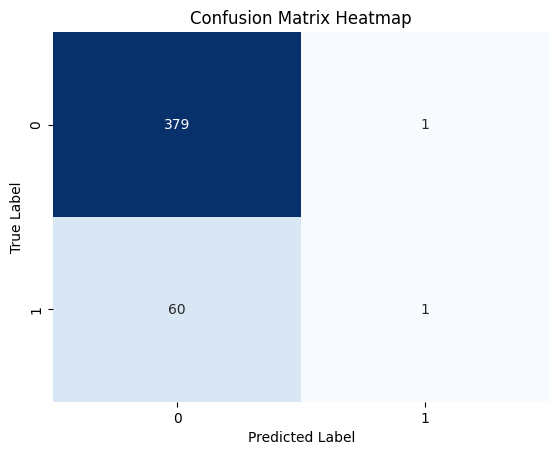

In [44]:
# Creating an annotated heatmap from the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap='Blues', cbar=False) #d to get integers
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


The heatmap above represents the confusion matrix for the classification model. It visually depicts the number of correct and incorrect predictions:

- **Top-Left (True Negative)**: 379 non-attritions correctly identified.
- **Top-Right (False Positive)**: 1 non-attritions incorrectly labeled as attritions.
- **Bottom-Left (False Negative)**: 60 attritions incorrectly labeled as non-attritions.
- **Bottom-Right (True Positive)**: 1 attrition correctly identified.

The color intensity reflects the number of observations in each category, indicating that the model is more effective at identifying non-attritions than attritions.

### Classification Analysis Results

**Model Performance Metrics:**
- **Accuracy**: Approximately 86%. This indicates the proportion of total predictions the model got right.
- **Classification Report**:
  - **Precision**: For non-attritions (0), it's 86%, and for attritions (1), it's 50%. This measures the correctness achieved in each class.
  - **Recall**: For non-attritions, it's 100%, and for attritions, it's 2%. This measures how many actual positives each class were correctly identified.
  - **F1-Score**: Combines precision and recall into a single metric. Higher for non-attritions due to better recall.
- **Confusion Matrix**:
  - The matrix [[379, 1], [60, 1]] shows the number of true positives, false positives, true negatives, and false negatives.

**Interpretation**:
- The model performs well in identifying non-attritions but struggles with identifying attritions (lower recall).
- The accuracy is moderate, suggesting the model is somewhat effective but could be improved, possibly by using more features or a different model.